In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 4) # -4 ... 10 
print('SD:', SD)

SD: 0.020480000000000005


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', 'BYND', 'COUR',
    'CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FSLY', 'FUV', 'GH', 
    'GMED', 'INTG', 'ISRG', 'JD', 'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 
    'MTCH', 'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 
    'RGEN', 'ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

51

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 7, 29))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['QDEL',
 'RDFN',
 'RGEN',
 'ROKU',
 'SE',
 'SHOP',
 'TDOC',
 'TEAM',
 'TREX',
 'TTD',
 'TTWO',
 '^GSPC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  12 of 12 completed
Generating derived columns...
   ...QDEL
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...^GSPC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 QDEL
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 29.22051219451122
Refitting current best...
Current best ma returns: 40.16767812874714
Fraction Invested: 0.605287199552228
Beginning random search...
New best: 36.399385372414756
Invested: 0.7730856511050973
New best: 41.42726570519455
Invested: 0.6696197182831668

Beginning adjusted search...
New best: 41.418845190626485
Invested: 0.6696197182831668
New best: 39.33171491788099
Invested: 0.6696197182831668
New best: 38.851006810833404
Invested: 0.6696197182831668
New best: 38.851006810833404
Invested: 0.6696197182831668
New best: 38.620040288000254
Invested: 0.6696197182831668
New best: 38.85118913225978
Invested: 0.6696197182831668
New best: 38.470640960863435
Invested: 0.6696197182831668


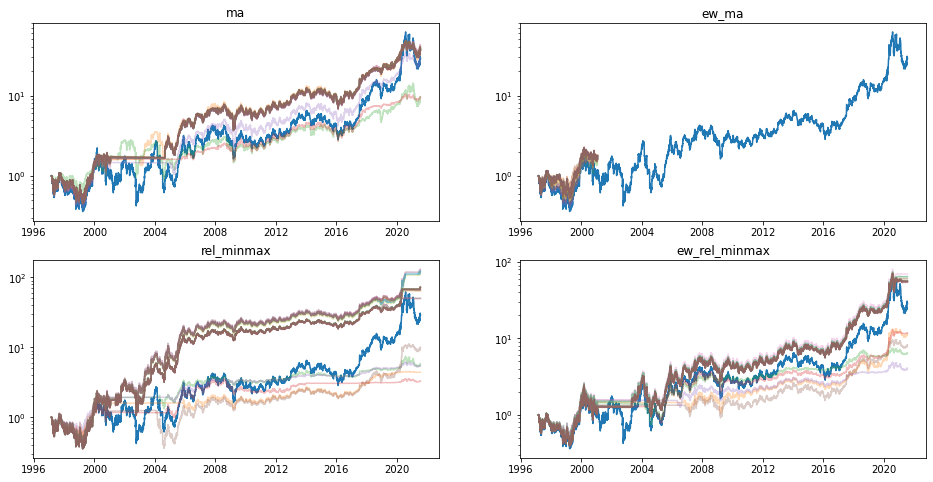

Saving QDEL params...



----------------------------------------------------------------------
                                 RDFN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.7520510300073573
Refitting current best...
Current best ma returns: 3.3899538311776163
Fraction Invested: 0.992785183964269
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 3.26874959416363
Invested: 0.992785183964269
New best: 3.340035183044075
Invested: 0.8625203510420983
New best: 3.3399291310342853
Invested: 0.8625203510420983
New best: 3.3483152271617413
Invested: 0.8328413944014207
New best: 3.345895432609959
Invested: 0.8328413944014207
New best: 3.3458867556552288
Invested: 0.8328413944014207
New best: 3.345930821511339
Invested: 0.8328413944014207
New best: 3.3457051636824664
Invested: 0.8328413944014207
New best: 3.345703763754373
I

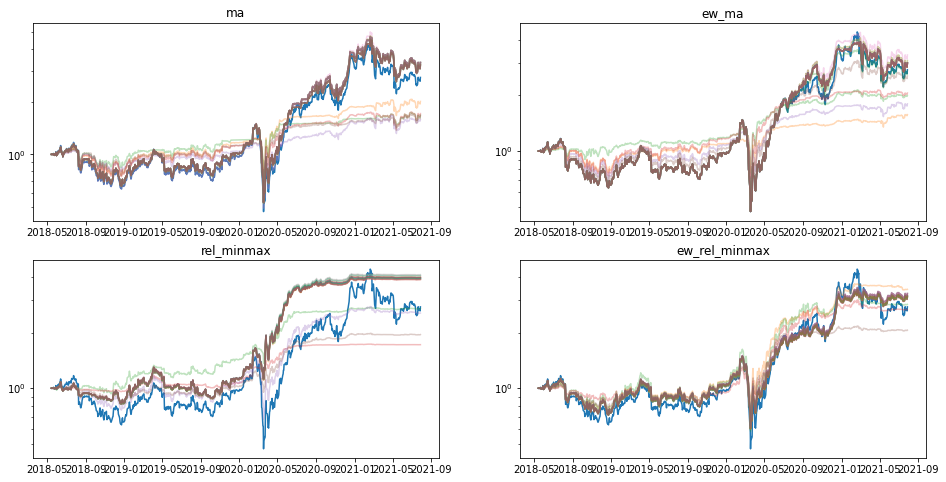

Saving RDFN params...



----------------------------------------------------------------------
                                 RGEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 36.1969228891226
Refitting current best...
Current best ma returns: 214.4125185219819
Fraction Invested: 0.15095446783710326
Beginning random search...
New best: 68.13446063549102
Invested: 0.6130346561762035
Round: 5
Beginning adjusted search...
New best: 72.79552506037093
Invested: 0.6130346561762035
New best: 72.99725160170773
Invested: 0.6130346561762035
New best: 69.91968948594325
Invested: 0.6130346561762035
New best: 69.82487035559048
Invested: 0.6130346561762035
New best: 70.54386561505699
Invested: 0.6130346561762035
New best: 70.64796712306321
Invested: 0.6130346561762035
New best: 70.87874453255961
Invested: 0.6130346561762035
New best: 71.4902822344317
Inves

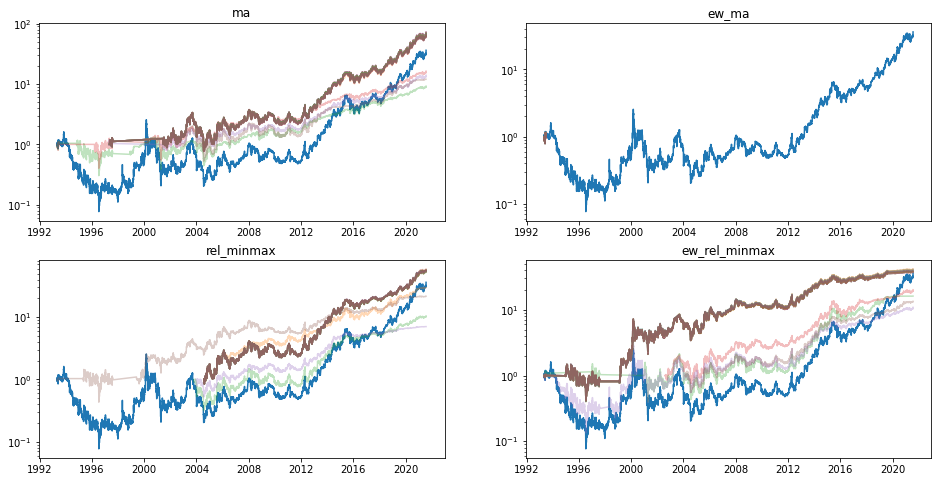

Saving RGEN params...



----------------------------------------------------------------------
                                 ROKU
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 10.31380770044655
Refitting current best...
Current best ma returns: 13.944907864824822
Fraction Invested: 0.993020965034979
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 13.944655744239713
Invested: 0.993020965034979
New best: 13.937708526541433
Invested: 0.993020965034979
New best: 13.93694261875687
Invested: 0.993020965034979
New best: 13.932457543251662
Invested: 0.9924061690147131
New best: 13.929125240417886
Invested: 0.9924061690147131
New best: 13.926167308555424
Invested: 0.9924061690147131
New best: 13.926167308555424
Invested: 0.9924061690147131
New best: 13.926379125766644
Invested: 0.9924061690147131
New best: 13.92622153637605


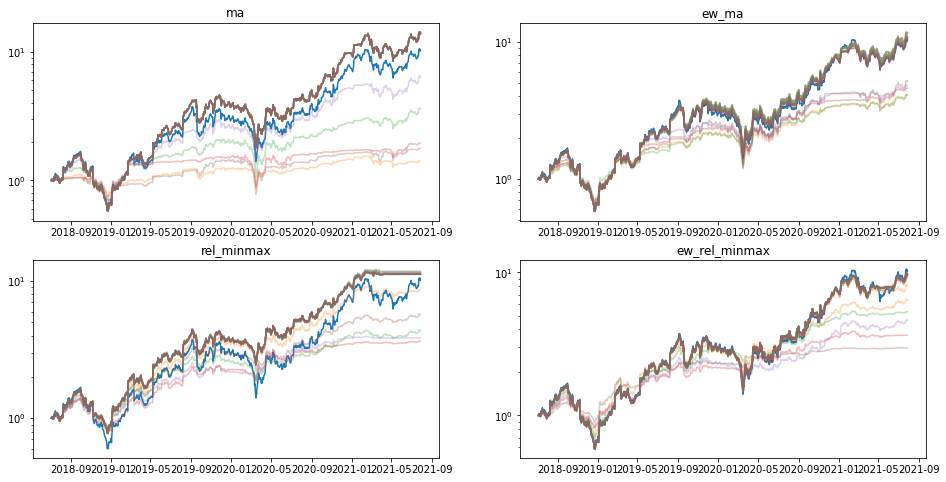

Saving ROKU params...



----------------------------------------------------------------------
                                 SE
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 19.268531809072805
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 19.268531809072805
Refitting current best...
Current best ew_ma returns: 24.83431916373704
Fraction Invested: 0.9999950090733384
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 24.827740718098106
Invested: 0.9999950090733384
New best: 24.827740718098106
Invested: 0.9999950090733384
New best: 24.827740718098106
Invested: 0.9999950090733384
New best: 24.826528436474543
Invested: 0.9999950090733384
New best: 24.8

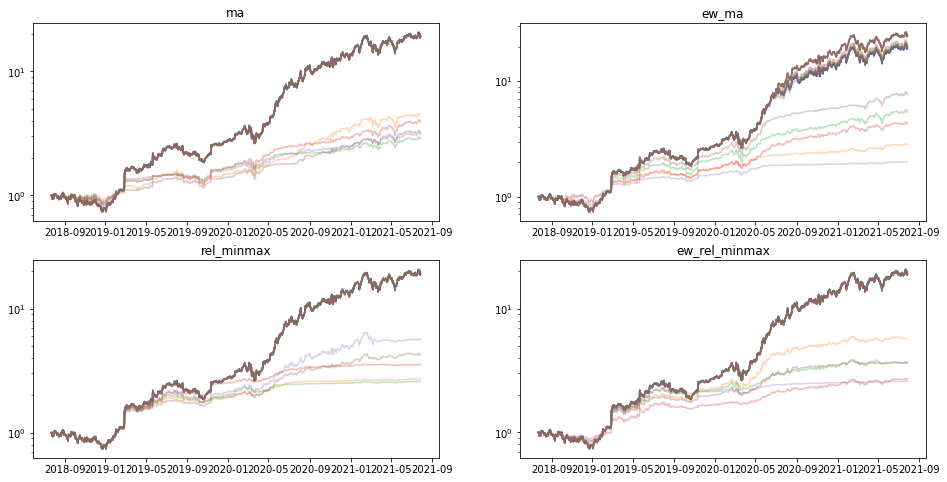

Saving SE params...



----------------------------------------------------------------------
                                 SHOP
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 39.05535699046161
Refitting current best...
Current best ma returns: 44.621828434260415
Fraction Invested: 0.9946310369796133
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 44.621828434260415
Invested: 0.9946310369796133
New best: 44.78011043798506
Invested: 0.9946310369796133
New best: 44.78801204894475
Invested: 0.9946310369796133
New best: 44.80233803888111
Invested: 0.9946310369796133
New best: 43.922017232800016
Invested: 0.9946310369796133
New best: 43.92125432295413
Invested: 0.9946310369796133
New best: 40.3288709199354
Invested: 0.9946310369796133
New best: 40.323658432118975
Invested: 0.9949341465061562
New best: 40.32250830376967
Inv

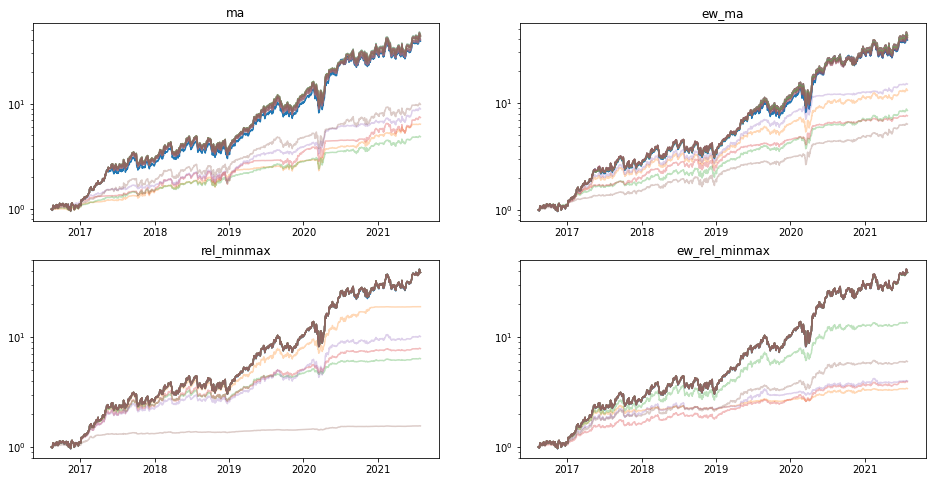

Saving SHOP params...



----------------------------------------------------------------------
                                 TDOC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 7.998419453107461
Refitting current best...
Current best ma returns: 11.098686695169905
Fraction Invested: 0.9999624755737504
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 11.094086088371755
Invested: 0.9999624755737504
New best: 11.101252876707402
Invested: 0.9999624755737504
New best: 11.089763761795295
Invested: 0.9999624755737504
New best: 9.74973171308384
Invested: 0.9999624755737504
New best: 9.750972088076079
Invested: 0.9999624755737504
New best: 9.750724691699139
Invested: 0.999870964831897
New best: 9.153309857673001
Invested: 0.999870964831897
New best: 9.154971937619983
Invested: 0.999870964831897
New best: 9.15496921591787
Inves

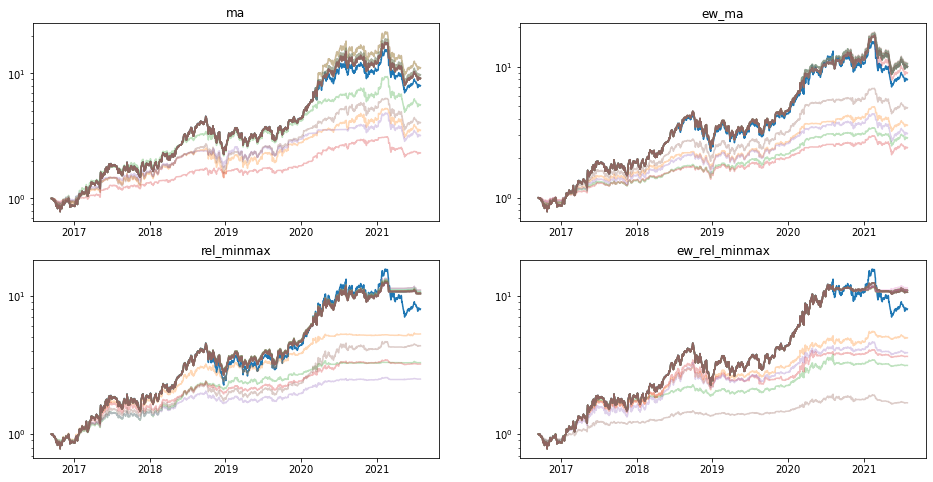

Saving TDOC params...



----------------------------------------------------------------------
                                 TEAM
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 9.661758811008873
Refitting current best...
Current best ma returns: 16.997073245582495
Fraction Invested: 0.9945428017178221
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 17.000710451500467
Invested: 0.9945428017178221
New best: 16.99573510866369
Invested: 0.9945428017178221
New best: 16.99573510866369
Invested: 0.9945428017178221
New best: 16.927421803953216
Invested: 0.9945428017178221
New best: 16.173472532814834
Invested: 0.9945428017178221
New best: 16.15901178039217
Invested: 0.9938818826625843
New best: 16.192975284218967
Invested: 0.9938818826625843
New best: 16.197391458536842
Invested: 0.9938818826625843
New best: 16.1973914585368

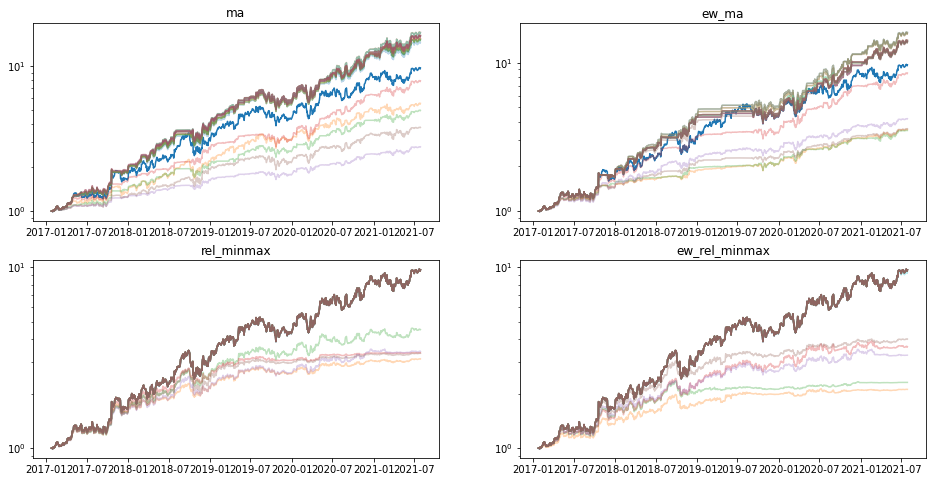

Saving TEAM params...



----------------------------------------------------------------------
                                 TREX
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 21.67521426970715
Refitting current best...
Current best ma returns: 67.55994392926323
Fraction Invested: 0.7798259158312902
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 60.377020736560354
Invested: 0.7798259158312902
New best: 60.470609728291876
Invested: 0.7798259158312902
New best: 60.36165779465223
Invested: 0.7798259158312902
New best: 60.45548856431968
Invested: 0.7798259158312902
New best: 59.408738869789104
Invested: 0.7798259158312902
New best: 59.20810773467788
Invested: 0.7798259158312902
New best: 59.25711471909739
Invested: 0.7798259158312902
New best: 59.22245755563434
Invested: 0.7798259158312902
New best: 59.24453681825301
I

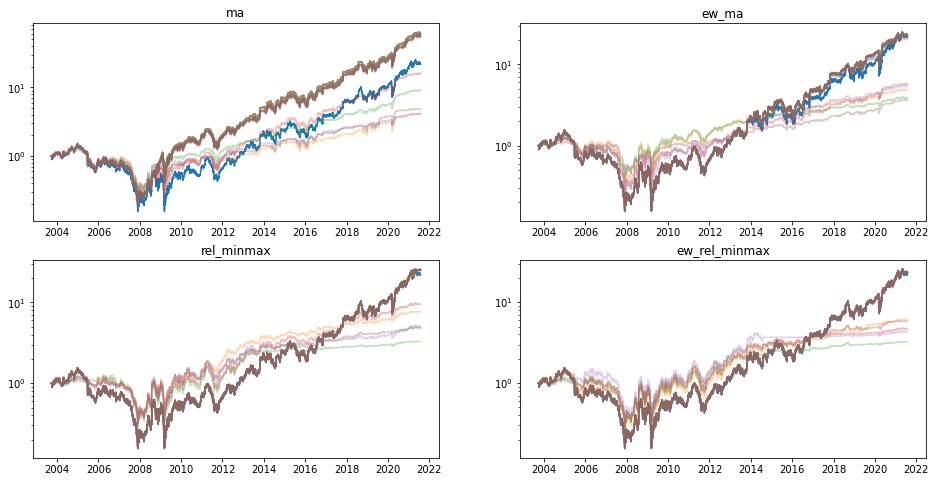

Saving TREX params...



----------------------------------------------------------------------
                                 TTD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 14.125804077166215
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 14.125804077166215
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 14.125804077166215
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_rel_minmax method...
-----------------

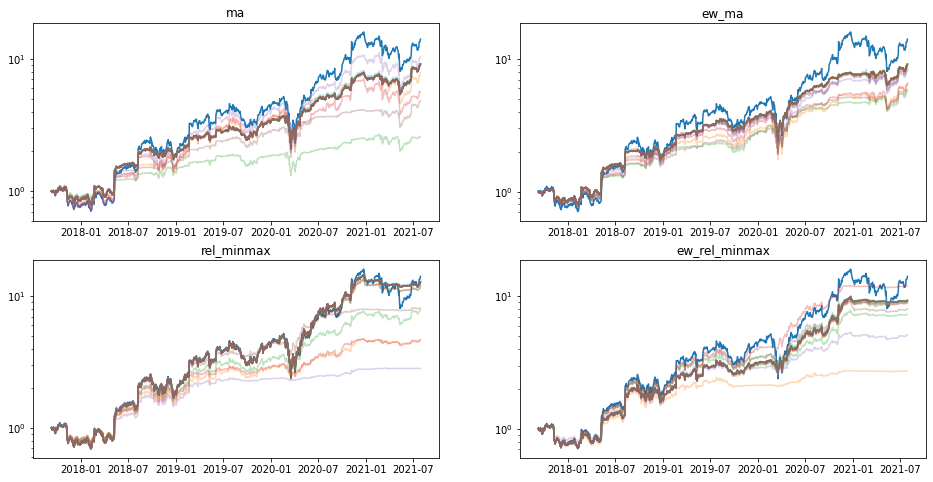

Saving TTD params...



----------------------------------------------------------------------
                                 TTWO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 15.870035436285686
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 15.870035436285686
Refitting current best...
Current best ew_ma returns: 21.30105988235293
Fraction Invested: 0.9985270280134636
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 21.301062872826016
Invested: 0.9985271288200009
New best: 21.301062872826016
Invested: 0.9985271288200009
New best: 21.197967500549016
Invested: 0.9985271288200009
New best: 21.197967500549016
Invested: 0.9985271288200009
New best: 21.

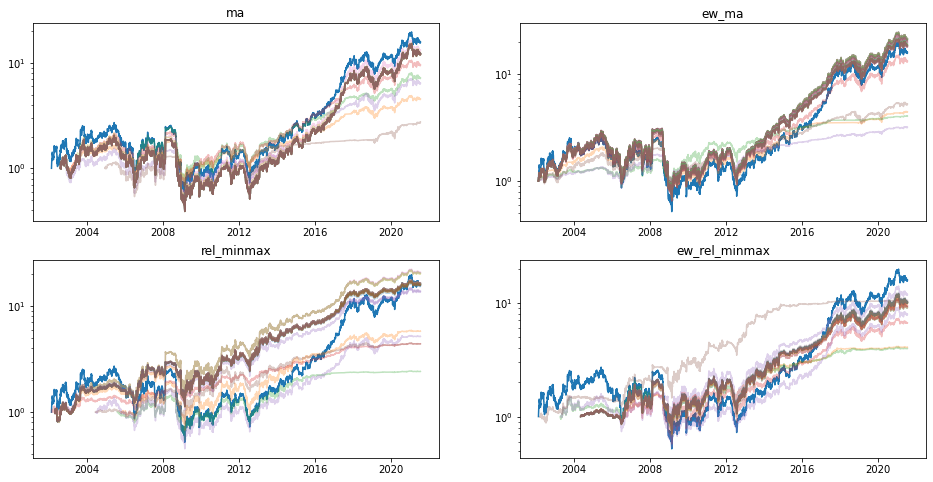

Saving TTWO params...



----------------------------------------------------------------------
                                 ^GSPC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 15.556561300759961
Refitting current best...
Current best ma returns: 17.381966879875186
Fraction Invested: 0.9941446043093198
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 17.38196564550096
Invested: 0.9941446043093198
New best: 17.376474770468604
Invested: 0.9941446043093198
New best: 17.37647278794403
Invested: 0.9941446043093198
New best: 17.11432203231381
Invested: 0.9941446043093198
New best: 17.11432203231381
Invested: 0.9941446043093198
New best: 16.21462553351251
Invested: 0.9941446043093198
New best: 16.205443937048763
Invested: 0.9941446043093198
New best: 16.20544720855773
Invested: 0.9941446043093198
New best: 16.20181105876567

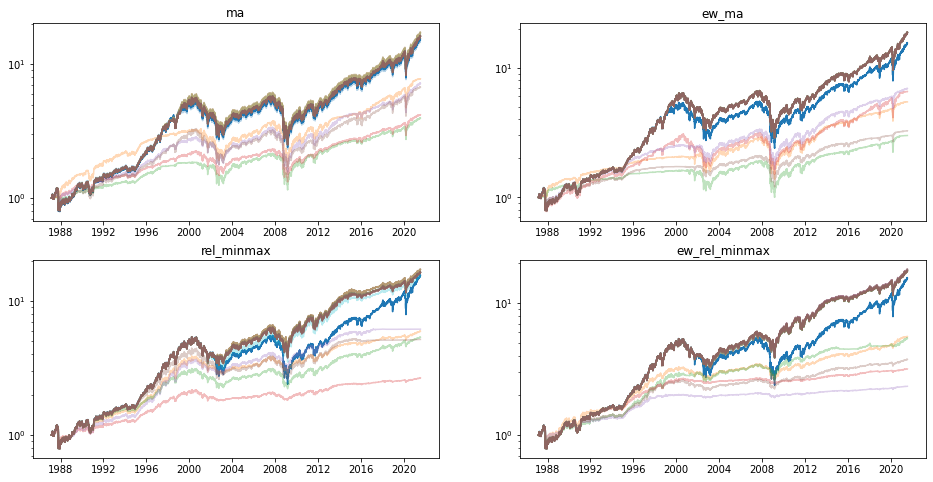

Saving ^GSPC params...


In [14]:
N_RAND = 5
N_ADJ = 20

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    best_params, best_returns = read_best_params(stock)
    stock_data = get_stock_data(stock, data)
    if stock == 'INTG':
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
    qp = QPercent(stock_data, 
                  N_CUTS, 
                  best_param_set=best_params, 
                  best_returns=best_returns, 
                  sd=SD)
    qp.run_sims(N_RAND, N_ADJ)
    best = get_best_param_set(qp)
    save_best_param_set(best, stock)

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


QDEL:
  Best Return: 70.80445491145771 (rel_minmax)
  31.93% in

RDFN:
  Best Return: 3.9681672411963764 (rel_minmax)
  2.57% in

RGEN:
  Best Return: 66.35591648111485 (ma)
  61.30% in

ROKU:
  Best Return: 13.93070097154097 (ma)
  99.35% in

SE:
  Best Return: 19.27134234904344 (ew_ma)
  100.00% in

SHOP:
  Best Return: 41.83691418238407 (ma)
  99.49% in

TDOC:
  Best Return: 10.638412812181722 (ew_ma)
  100.00% in

TEAM:
  Best Return: 15.980199221043456 (ma)
  99.39% in

TREX:
  Best Return: 53.37395674046269 (ma)
  77.98% in

TTD:
  Best Return: 14.125804077166215 (ma)
  100.00% in

TTWO:
  Best Return: 18.399345950841152 (ew_ma)
  99.85% in

^GSPC:
  Best Return: 18.650683455313256 (ew_ma)
  97.07% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq